# Project for increasing revenue for an online store

## Introduction

In the upcoming project, our main task is to find the best way to increase the online store's revenue. We have a list of hypotheses provided by the marketing department. We will prioritize the hypotheses according to the RICE and ICE frameworks and then make an A/B test for the hypothesis of the highest priority.
During the process of conducting A/B testing, we will carry out standard steps for the received data analysis:
1. Evaluate the cumulative data (receipt, revenue, conversion) and build the necessary graphs;
2. Determine abnormal data;
3. Calculate the statistical significance of differences in raw data and in filtered data;
4. Decide whether to stop or continue the experiment;
5. Draw conclusions based on the conducted study.


## Data overview

###  Import of libraries

In [100]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

We imported necessary libraries.

### Import of datasets

In [101]:
try: 
    hypothesis = pd.read_csv('C:/Praktikum/a_b_test_project/hypothesis_ab.csv')
    orders = pd.read_csv('C:/Praktikum/a_b_test_project/orders_ab.csv')
    visitors = pd.read_csv('C:/Praktikum/a_b_test_project/visitors_ab.csv')
except: 
    hypothesis = pd.read_csv('/datasets/hypothesis.csv') # specified local and public paths
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')

In [102]:
def data_first_look(data):
    print('Main information:')
    print()
    data.info()
    print()
    print('The first 10 rows of the data:')
    display(data.head())
    print()
    print('Main characteristics of the data:')
    display(data.describe())
    print()
    print('The amount of duplicates in data is', data.duplicated().sum())
    
data_first_look(hypothesis) 


Main information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes

The first 10 rows of the data:


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1



Main characteristics of the data:


,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000



The amount of duplicates in data is 0


In [103]:
data_first_look(orders)

Main information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB

The first 10 rows of the data:


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B



Main characteristics of the data:


,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06



The amount of duplicates in data is 0


In [104]:
data_first_look(visitors)

Main information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB

The first 10 rows of the data:


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756



Main characteristics of the data:


,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000



The amount of duplicates in data is 0


**We imported the files and looked at the basic information about the dataset. We divided dataset into 4 column: event data, user id, event date, and group id in the a/b test.**

### Data preprocessing

In [105]:
hypothesis.columns = hypothesis.columns.str.lower() # changed the column names to lower case
orders.columns = orders.columns.str.lower()
orders.rename({'transactionid':'transaction_id', 'visitorid':'visitor_id'}, axis=1, inplace = True) # rename the columns
orders['date'] = pd.to_datetime(orders['date']) # changed to datetime type
visitors.columns = visitors.columns.str.lower()
visitors['date'] = pd.to_datetime(visitors['date'])

We renamed the columns and changed the data format.

In [106]:
hypothesis.info() 
orders.info()
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
<class 'pandas.core.frame

Checked if every changes worked out.

In [107]:
display(visitors.duplicated().sum(), orders.duplicated().sum(), hypothesis.duplicated().sum())

0

0

0

We checked our data for duplicates - there are none. At this point, data preprocessing can be considered complete and we can proceed to examine the data for correctness.

## Examine the data for correctness

In [108]:
orders.groupby('visitor_id', as_index=False)\
    .agg({'group':'nunique'})\
    .query("group==2").count()

visitor_id    58
group         58
dtype: int64

We checked if there are users who were distributed into both groups.
We found out that 58 users got into both groups of the test. It indicates the incorrect operation of the user separation mechanism. There are two strategies to handle it:
- remove these users
- leave it as it is

Since we need to remove them from the data, and as we cannot do this (the dataset of visits is aggregated by days), the only option is to leave them in the dataset.


## Hypotheses prioritization

### Data overview

In [109]:
pd.set_option("display.max_colwidth", 150)
display(hypothesis)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


We reviewed nine hypotheses that were provided to us by the marketing department. All of them seem pretty promising, but in order to save money and time, we need to choose the most reliable one. We will use for prioritization two methods: ICE and RICE.
These methods use in their calculations the number of resources needed to implement this hypothesis, the number of users who will be affected by this change, how many users will be affected by it, and how confident we are in these forecasts.
The marketing department has already provided us with this data, so our task is to prioritize the hypotheses according to the formula.


### Calculation of prioritization according to the ICE method


In [110]:
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'].round()
hypothesis[['hypothesis','ICE']].sort_values(by='ICE', ascending=False)
hypothesis

,hypothesis,reach,impact,confidence,efforts,ICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000


We prioritized the hypotheses according to the ICE method. This method includes three parameters:
1. Impact - how much the change will affect users, their experience and satisfaction with the product,
2. Efforts - the cost of testing this hypothesis,
3. Confidence - how confident we are that this change will affect users in a particular way.

According to this method, the top three hypotheses are:
1. Launching a promotion that gives a discount on goods on a user’s birthday,
2. Adding two new channels to attract traffic, which will engage 30% more users,
3. Adding a subscription form to all main pages to build a customer base for email newsletters.

But in order to decide whether to conduct an A / B test on one of these hypotheses, we need to check our prioritization by one more method - RICE. This method uses an additional parameter - Reach - how many users will be affected by the change we want to make.


### Calculation of prioritization according to the RICE method

In [111]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'].round()
hypothesis[['hypothesis','RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


According to the prioritization calculation using the RICE method, the following hypotheses were in the top 3:
1. Adding a subscription form to all main pages to build a customer base for email newsletters,
2. Adding blocks of product recommendations to the website of the online store in order to increase the conversion and the average check of the order,
3. Adding two new channels to attract traffic, which hopefully will attract 30% more users,

Indeed, if we add the Reach factor, the hypothesis about a discount on a product on a birthday of the user loses because it only affects those users who have a birthday on that particular day.

### Hypothesis Prioritization Conclusion

In [112]:
display(hypothesis.sort_values(by='RICE', ascending=False))
pd.reset_option("display.max_colwidth", 150)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


If we aggregate the result of hypotheses prioritization by the RICE and ICE methods, we will find out that the two of the top-three hypotheses coincide.

These are the following hypotheses: 
1) add a subscription form on all main pages

2) add two new channels to increase traffic.

The points scored by each hypothesis by both methods are in the table above

Based on them, we can conclude that adding a subscription form is the most promising hypothesis.
This hypothesis has slightly less (by 2.1) points on the ICE metric, but significantly more (by 72) points on the RICE method.


## A/B test analysis

In this part of the project, we will analyze the results of the A/B test. We did it based on the hypothesis chosen in the previous part. 
This is adding a subscription form to all the main pages in order to build a customer base for email newsletters. 
The analysis consists of the following steps:
1. Evaluate the cumulative data (receipt, revenue, conversion) and build the necessary graphs;
2. Define abnormal data and outliers;
3. Calculate the statistical significance of differences for raw data and for data without outliers;
4. Draw conclusions based on the research;
5. Decide whether to stop the A / B test or continue it.

### Data overview

In the first part of the project, we already got acquainted with the data, but now we need to pay attention to additional details: how evenly the users are distributed among the test groups and what is going on with the revenue in both groups.

In [113]:
orders.head(5)

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [114]:
orders.groupby(['group']).agg({'visitor_id':'nunique'})

,visitor_id
group,
A,503
B,586


<a class="anchor" id="21-bullet">

We have an assigned group for each user - we see this in the data (dataset <code>orders</code>). If the test is designed correctly, the user's group does not change throughout it. We calculate how many unique groups there are for each user. We take a dataset of orders, group it by user_id, and count the unique number of groups.

In [115]:
print(orders['date'].min()) 
print(orders['date'].max())

2019-08-01 00:00:00
2019-08-31 00:00:00


In [116]:
orders.groupby(['group']).agg({'revenue':'sum'}) # calculated sale's amount

,revenue
group,
A,4084803
B,5907760


We estimated the total amount of revenue in each group - the revenue is significantly higher in raw data in group B. During further analysis, we will determine whether this difference is statistically significant.

In [117]:
visitors.head(5) # checked the second dataset

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [118]:
print(visitors['date'].min())
print(visitors['date'].max()) # the dates in the datasets of visitors and sales are coincide

2019-08-01 00:00:00
2019-08-31 00:00:00


In [119]:
visitors.groupby(['group']).agg({'visitors':'sum'}) # calculated amount of visits

,visitors
group,
A,18736
B,18916


We found out that there are users who were distributed in both groups: perhaps these are users who made several orders on different days, so they accidentally came across different types of pages.
Unfortunately, this indicates a poor-quality division into groups, although the total number of visitors in each group is approximately the same.
We cannot remove these users completely, as they remain in the general list of visitors and cannot be removed from there. Therefore, we will work more carefully with outliers, look at the average number of orders by users, and remove those who made an anomalous number of orders. Most likely, these users will coincide with the incorrectly distributed, because they made more than one order.


### Calculation of cumulative metrics

In [120]:
dates_groups = orders[['date','group']].drop_duplicates()

Created an array of unique pairs of date values and test groups.

In [121]:
orders_aggregated = (
                     dates_groups
                     .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
                     .agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1)
                     .sort_values(by=['date','group'])
)
# we get aggregated cumulative daily data of orders

In [122]:
visitors_aggregated = (
                        dates_groups
                        .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                        .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
                        .sort_values(by=['date','group'])
)
# we get aggregated daily cumulative data on online store visitors

In [123]:
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
# we combine cumulative data in one table and assign names to its columns
print(cumulative_data.head(5)) 

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


We build graphs of daily cumulative revenue by groups of A/B testing:

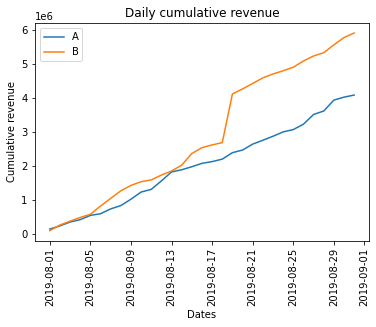

In [124]:
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')

plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')
plt.xticks(rotation=90)
plt.title("Daily cumulative revenue")
plt.xlabel("Dates")
plt.ylabel("Cumulative revenue")
plt.legend() 
plt.show()

Revenue increases almost evenly throughout the test. It’s a good sign.
However, the revenue graph of group B at one point is sharply rising. 
This may be the sign of either a sharp increase in the number of orders or in the price of orders.

We build graphs of the average bill by groups - we divide the cumulative revenue by the cumulative number of orders:

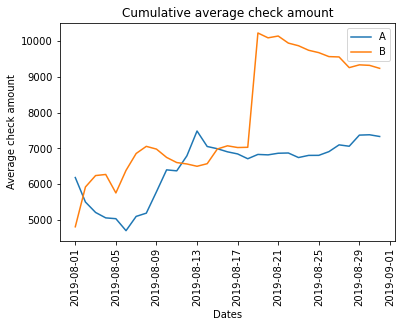

In [125]:
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')
plt.legend()
plt.xticks(rotation=90)
plt.title("Cumulative average check amount")
plt.xlabel("Dates")
plt.ylabel("Average check amount")
plt.show()

The graphs are unpredictable: there were sharp rises in sales in both groups; the average check increased by 1.5 times in group B at one moment. This clearly indicates an outlier in the values.

We build a graph of the relative difference for the average bill. 

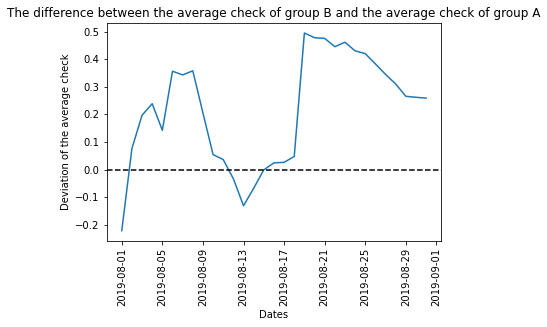

In [126]:
cumulative_revenue_merge = cumulative_revenue_a.merge(cumulative_revenue_b, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
# collect data in one dataframe
plt.plot(cumulative_revenue_merge['date'], (cumulative_revenue_merge['revenueB']/cumulative_revenue_merge['ordersB'])/(cumulative_revenue_merge['revenueA']/cumulative_revenue_merge['ordersA'])-1)
# build the ratio of average bills
plt.axhline(y=0, color='black', linestyle='--')
# add x axis
plt.xticks(rotation=90)
plt.title("The difference between the average check of group B and the average check of group A")
plt.xlabel("Dates")
plt.ylabel("Deviation of the average check")
plt.show()

At several points, the graph of the difference between the segments rises sharply. This also shows outliers in data.

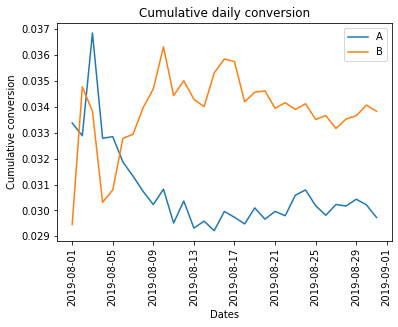

In [127]:
# calculate cumulative conversion
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

# slicing data by group A
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']

# slicing data by group B
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

# build graphs
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')
plt.legend()

# set the scale of the axes

plt.xticks(rotation=90)
plt.title("Cumulative daily conversion")
plt.xlabel("Dates")
plt.ylabel("Cumulative conversion")
plt.show()

The result is an almost symmetrical graph. The groups fluctuated around the same value, but then the conversion of group B took the lead and fixed, while the conversion of group A dropped and also fixed.

We build a graph of the relative difference in cumulative conversions:

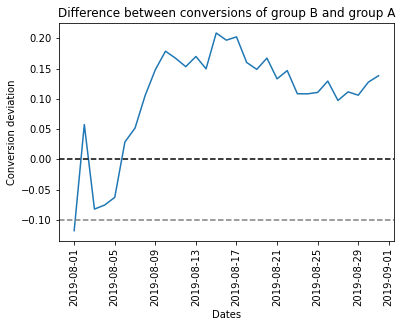

In [128]:
cumulative_conversion_merge = cumulative_data_a[['date','conversion']].merge(cumulative_data_b[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(cumulative_conversion_merge['date'], cumulative_conversion_merge['conversionB']/cumulative_conversion_merge['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')

plt.xticks(rotation=90)
plt.title("Difference between conversions of group B and group A")
plt.xlabel("Dates")
plt.ylabel("Conversion deviation")
plt.show()

The conversion of group B was clearly fixed above the conversion of group A.
So far, both the graphs and the total revenue show us that sales were better before the implementation of changes.

### Analysis of outliers

As we found out in the charts above, there were clearly outliers in the orders - checks or the number of orders that were significantly different from the average. In this part, we will find them and determine how much they affect the result.

#### Abnormal number of orders

In this part of the project, we will find how many orders for one user are abnormal.

In [129]:
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users.columns = ['user_id', 'orders']

print(orders_by_users.sort_values(by='orders', ascending=False).head(10))

         user_id  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


We counted the number of orders per user.

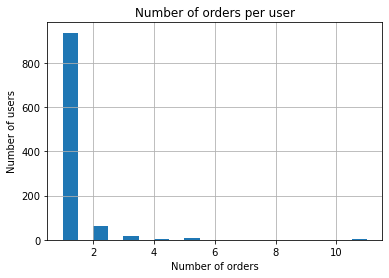

In [130]:
orders_by_users['orders'].hist(bins=20)
plt.title("Number of orders per user")
plt.xlabel("Number of orders")
plt.ylabel("Number of users")
plt.show()

We built a histogram showing the distribution of the number of orders per user. The majority of users make one or two orders, rarely three. 
But there are also users who have made five or even ten orders. To find out how many of these users there are we build a scatterplot.


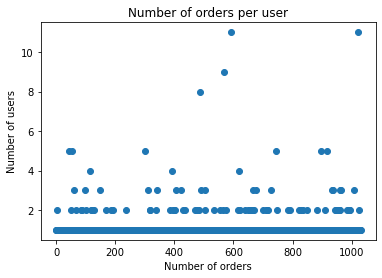

In [131]:
x_values = pd.Series(range(0, len(orders_by_users)))
plt.scatter(x_values,orders_by_users['orders'])
plt.title("Number of orders per user")
plt.xlabel("Number of orders")
plt.ylabel("Number of users")
plt.show()

The scatterplot confirmed the conclusions from the histogram: more than two orders are made by single users, and the majority are still limited to one. 

In [132]:
print(np.percentile(orders_by_users['orders'],[90,95,99]))

[1. 2. 4.]


We calculated the percentage distribution of the number of orders. 
As expected, 90% of users make one order, 5% two, and only 1% of users make more than 4 orders. 
At the same time, this one percent of users significantly affect the statistics. We consider it an outlier and in the next part of the project, we calculate the statistical coefficients without these orders.

#### Abnormal order cost

In this part, we find out what order cost is abnormal.

In [133]:
print(orders.sort_values(by='revenue', ascending=False).head(10))

      transaction_id  visitor_id       date  revenue group
425        590470918  1920142716 2019-08-19  1294500     B
1196      3936777065  2108080724 2019-08-15   202740     B
858        192721366  1316129916 2019-08-27    93940     A
1136       666610489  1307669133 2019-08-13    92550     A
744       3668308183   888512513 2019-08-27    86620     B
682       1216533772  4266935830 2019-08-29    78990     B
662       1811671147  4266935830 2019-08-29    78990     A
743       3603576309  4133034833 2019-08-09    67990     A
1103      1348774318  1164614297 2019-08-12    66350     A
1099       316924019   148427295 2019-08-12    65710     A


We have sorted the purchases in descending order. The order cost of the first few checks is clearly higher than the next ones.


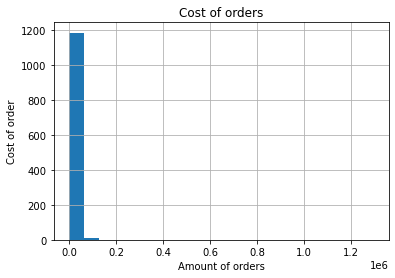

In [134]:
orders['revenue'].hist(bins=20)
plt.title("Cost of orders")
plt.xlabel("Amount of orders")
plt.ylabel("Cost of order")
plt.show()

We have built a histogram showing the average cost of the order. The average order is within 50,000 rubles, but there are checks that exceed this sum. To find out how many of these orders there are we build a scatterplot.

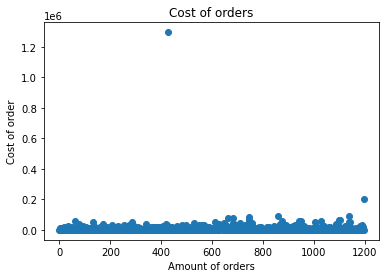

In [135]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title("Cost of orders")
plt.xlabel("Amount of orders")
plt.ylabel("Cost of order")
plt.show()

The scatterplot confirms that the majority of checks are within 50,000 rubles, but there is one that exceeds a million. It is clearly an outlier.

In [136]:
print(np.percentile(orders['revenue'],[90,95,99]))

[18168.  28000.  58233.2]


We calculated the percentage distribution of the cost of orders.  
90% of checks are not even within 50,000 rubles, but below 18,000 rubles, the cost of 95% of orders is below 28,000 rubles. And only one percent of checks exceed 58,000 rubles. At the same time, this one percent of orders significantly affect the statistics. We consider it an outlier. In the following part of the project, we will calculate the statistical coefficients without these orders.


### Analysis of statistical significance on raw data

In this part, we find out whether the difference between the two groups is statistically significant. Our <b>null hypothesis</b> is that <b>there is no statistically significant difference between the two groups</b>. The <b>alternative hypothesis</b> that <b>there is a statistically significant difference between the groups</b>. 

<a class="anchor" id="24-bullet">

In [137]:
visitors_a_daily = visitors.query('group == "A"')[['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a'] # number of visitors per day in group A

visitors_a_cummulative = visitors_a_daily.apply(
    lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}
    ),
    axis=1,
)
visitors_a_cummulative.columns = ['date', 'visitors_cummulative_a'] # cumulative number of visitors in group A

visitors_b_daily = visitors.query('group == "B"')[['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b'] # number of visitors per day in group B

visitors_b_cummulative = visitors_b_daily.apply(
    lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}
    ),
    axis=1,
)
visitors_b_cummulative.columns = ['date', 'visitors_cummulative_b'] # cumulative number of visitors in group B


orders_a_daily = (
    orders.query('group == "A"')[['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a'] # daily revenue in group A

orders_a_cummulative = orders_a_daily.apply(
    lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_a': 'sum', 'revenue_per_date_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_a_cummulative.columns = [
    'date',
    'orders_cummulative_a',
    'revenue_cummulative_a',
] # cumulative revenue in group A

orders_b_daily = (
    orders.query('group == "B"')[['date','transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b'] # daily revenue in group A

orders_b_cummulative = orders_b_daily.apply(
    lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_b': 'sum', 'revenue_per_date_b': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_b_cummulative.columns = [
    'date',
    'orders_cummulative_b',
    'revenue_cummulative_b',
] # cumulative revenue in group A
data = (
    orders_a_daily.merge(
        orders_b_daily, left_on='date', right_on='date', how='left'
    )
    .merge(orders_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(orders_b_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_a_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_b_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_b_cummulative, left_on='date', right_on='date', how='left')
) # aggregated data

In [138]:
print(data.head())

        date  orders_per_date_a  revenue_per_date_a  orders_per_date_b  \
0 2019-08-01                 24              148579                 21   
1 2019-08-02                 20               93822                 24   
2 2019-08-03                 24              112473                 16   
3 2019-08-04                 16               70825                 17   
4 2019-08-05                 25              124218                 23   

   revenue_per_date_b  orders_cummulative_a  revenue_cummulative_a  \
0              101217                    24                 148579   
1              165531                    44                 242401   
2              114248                    68                 354874   
3              108571                    84                 425699   
4               92428                   109                 549917   

   orders_cummulative_b  revenue_cummulative_b  visitors_per_date_a  \
0                    21                 101217                 

We aggregated daily data of revenue and the number of visitors in each group in one dataset.

In [139]:
orders_by_users_a = (
    orders.query('group == "A"')
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id':pd.Series.nunique})
)
orders_by_users_a.columns = ['visitor_id', 'orders']

orders_by_users_b = (
    orders.query('group == "B"')
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id':pd.Series.nunique})
)
orders_by_users_b.columns = ['visitor_id', 'orders']


sample_a = pd.concat(
    [
        orders_by_users_a['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b = pd.concat(
    [
        orders_by_users_b['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
mannwhitney_nonfilt = stats.mannwhitneyu(sample_a, sample_b, True, 'two-sided')[1]
relative_conversion_nonfilt = data['orders_per_date_b'].sum()/data['visitors_per_date_b'].sum()/(data['orders_per_date_a'].sum()/data['visitors_per_date_b'].sum())-1
# created variables where users with orders will match with a number of user orders
print('Statistical significance of the conversion difference according to the Mann-Whitney test',"{0:.3f}".format(mannwhitney_nonfilt))

print('Relative difference in conversion between groups',"{0:.3f}".format(relative_conversion_nonfilt))

alpha = 0.05 # set the level of significance

if mannwhitney_nonfilt < alpha:
    print("We reject the null hypothesis. There is a statistically significant difference between groups A and B.")
else:
    print("We accept the null hypothesis. There is no statistically significant difference between groups A and B.")


if relative_conversion_nonfilt:
    print('The conversion in group B is higher than the conversion in group A by', '{0:.2f}'.format(relative_conversion_nonfilt*100), '%')
else:
    print('The conversion in group A is higher than the conversion in group B by', '{0:.2f}'.format(relative_conversion__nonfilt*100), '%')

Statistical significance of the conversion difference according to the Mann-Whitney test 0.017
Relative difference in conversion between groups 0.149
We reject the null hypothesis. There is a statistically significant difference between groups A and B.
The conversion in group B is higher than the conversion in group A by 14.90 %


The first number is below The first number is above the accepted significance level of 0.05. This means there is no reason to reject the null hypothesis and believe that there are differences in the average bill. However, the average order cost in group B is significantly higher than the average order cost in group A.
To confirm or reject the conclusion, we will calculate the same parameters on the data without outliers.
the accepted p-value of 0.05. Therefore, according to raw data, there is a statistically significant difference in conversion between groups. At the same time, the conversion in group B is higher than the conversion in group A by 15%.

In [140]:
mannwhitney_receipt_nf = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], True, 'two-sided')[1]
relative_conversion_receipt_nf = orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1
print('Statistical significance of the conversion difference by average check amounts','{0:.3f}'.format(mannwhitney_receipt_nf))
print('The relative increase in the average check amount of group B','{0:.3f}'.format(relative_conversion_receipt_nf))

alpha = 0.05

if mannwhitney_receipt_nf < alpha:
    print("We reject the null hypothesis. There is a statistically significant difference between the costs of orders in groups A and B.")
else:
    print("We accept the null hypothesis. There is no statistically significant difference between the cost of orders in groups A and B.")


if relative_conversion_receipt_nf:
    print('The average order cost in group B is higher than the average order cost in group A by', '{0:.2f}'.format(relative_conversion_receipt_nf*100), '%')
else:
    print('The average order cost in group A is higher than the average order cost in group B by', '{0:.2f}'.format(relative_conversion__receipt_nf*100), '%')

Statistical significance of the conversion difference by average check amounts 0.729
The relative increase in the average check amount of group B 0.259
We accept the null hypothesis. There is no statistically significant difference between the cost of orders in groups A and B.
The average order cost in group B is higher than the average order cost in group A by 25.87 %


The first number is above the accepted significance level of 0.05. This means there is no reason to reject the null hypothesis and believe that there are differences in the average bill. However, the average order cost in group B is significantly higher than the average order cost in group A.
To confirm or reject the conclusion, we will calculate the same parameters on the data without outliers


### Analysis of statistical significance on filtered data

In [141]:
users_with_many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > 2]['visitor_id'],
        orders_by_users_b[orders_by_users_b['orders'] > 2]['visitor_id'],
    ],
    axis=0,
) # find outliers in the number of orders
users_with_expensive_orders = orders[orders['revenue'] > 28000]['visitor_id'] # find outliers in orders cost
abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormal_users.head(5))
print(abnormal_users.shape)

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitor_id, dtype: int64
(74,)


We got a list of users who made either a lot of orders or orders with a high average cost. There are 74 of them.

We find out how the actions of these users influenced the test results. We calculate the statistical significance of the differences in conversion between test groups based on the filtered data. First, we prepare samples of the number of orders by users by test groups:

In [142]:
normal_users_a = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

normal_users_b = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
mannwhitney_filt = stats.mannwhitneyu(normal_users_a, normal_users_b, True, 'two-sided')[1]
relative_conversion_filt = normal_users_b.mean()/normal_users_a.mean()-1

print('Statistical significance of the conversion difference according to the Mann-Whitney test',"{0:.3f}".format(mannwhitney_filt))

print('Relative difference in conversion between groups',"{0:.3f}".format(relative_conversion_filt))

alpha = 0.05 # set the significance level

if mannwhitney_filt < alpha:
    print("We reject the null hypothesis. There is a statistically significant difference between groups A and B.")
else:
    print("We accept the null hypothesis. There is no statistically significant difference between the cost of orders in groups A and B.")


if relative_conversion_filt:
    print('The conversion in group B is higher than the conversion in group A by', '{0:.2f}'.format(relative_conversion_filt*100), '%')
else:
    print('The conversion in group A is higher than the conversion in group B by', '{0:.2f}'.format(relative_conversion__filt*100), '%')

Statistical significance of the conversion difference according to the Mann-Whitney test 0.013
Relative difference in conversion between groups 0.173
We reject the null hypothesis. There is a statistically significant difference between groups A and B.
The conversion in group B is higher than the conversion in group A by 17.27 %


The first number is below the accepted p-value of 0.05. Therefore, according to the filtered data, there is also a difference in conversion between groups. The conversion in group B is higher than the conversion in group A by 17%.

In [143]:
mannwhitney_receipt_f = (
            stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
        True, 'two-sided')[1]
)
print("Statistical significance of the conversion difference by average check amounts",
    '{0:.3f}'.format(mannwhitney_receipt_f))
relative_conversion_receipt_f = (
    orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1
)
print('The relative increase in the average check amount of group B',"{0:.3f}".format(relative_conversion_receipt_f))

alpha = 0.05

if mannwhitney_receipt_f < alpha:
    print("We reject the null hypothesis. There is a statistically significant difference between the costs of orders in groups A and B.")
else:
    print("We accept the null hypothesis. There is no statistically significant difference between the cost of orders in groups A and B.")


if relative_conversion_receipt_f:
    print('The average order cost in group B is higher than the average order cost in group A by', '{0:.2f}'.format(relative_conversion_receipt_f*100), '%')
else:
    print('The average order cost in group A is higher than the average order cost in group B by', '{0:.2f}'.format(relative_conversion__receipt_f*100), '%')

Statistical significance of the conversion difference by average check amounts 0.738
The relative increase in the average check amount of group B -0.020
We accept the null hypothesis. There is no statistically significant difference between the cost of orders in groups A and B.
The average order cost in group B is higher than the average order cost in group A by -1.96 %


Statistical significance is above the set significance level of 0.05. This means there is no reason to reject the null hypothesis and believe that there are significant differences in the average bill.
At the same time, the average check of group B is now lower by 2%. Based on the statistical indicators of the filtered data, we can conclude that there are no significant differences between the groups.


## Overall conclusion

Final conclusions on the A / B test:
1. There is a statistically significant difference in conversion between groups both on raw data and filtered data.
2. For both raw and filtered data, there is no statistically significant difference in the average amount of orders between groups.
3. In the raw data, the average cost order in group B was significantly higher than in group A. But in the filtered data, the average cost order in group B is lower than in group A by 2%.
4. The graph of the difference in conversion between groups shows that the results of group B are better than group A: they are consistently above the average.

Based on the conclusions made, we decide to <b>stop the A/B test</b>.

The <b>Hypothesis</b> that adding a sign-up form to all of the main pages will increase revenue to the company <b>was not confirmed</b>.

So we can start testing the next theory of adding two new traffic acquisition channels.

Hopefully, it turns out to be more promising.

Moreover, in the next test, we will need to monitor the distribution of users into groups more thoroughly in case to avoid the situation with users who were divided into both testing groups.
Thank you for your attention to the project.
